# Math 245 Computer Project
**Shannon Brownlee**
- **Prof. Sergey Vladmimir Lototsky**
- **Fall 2019**

Solving the differential equation for y, you get y=e^(ax)+c. Using the initial condition of y(0)=1, it is found that y(x)=e^(ax).

In [61]:
#Basic error when p = 1 and N is large
import math

a = 1
Lambda = 0.5

N = 10000

# numerical solution
y_numerical = [0]*(N+1)
y_numerical[0] = 1

# exact solution
y_exact = [0]*(N+1)
y_exact[0] = 1

error = 0
# loop: n is from 1 to N
for n in range(1, N+1):
    y_numerical[n] = (1+a*Lambda/N) / (1-a*(1-Lambda)/N)*y_numerical[n-1]
    y_exact[n] = math.exp(a*n/N)
    
    # p = 1
    error = error + abs(y_numerical[n] - y_exact[n])
    
error = error/N
print("Error when N = 10000, p = 1, a = 1, and lambda = 0.5:", error)

Error when N = 10000, p = 1, a = 1, and lambda = 0.5: 8.353433787133824e-10


In [62]:
#Basic error when p=1 and N is small
a = 1
Lambda = 0.5

N = 10

# numerical solution
y_numerical = [0]*(N+1)
y_numerical[0] = 1

# exact solution
y_exact = [0]*(N+1)
y_exact[0] = 1

error = 0
# loop: n is from 1 to N
for n in range(1, N+1):
    y_numerical[n] = (1+a*Lambda/N) / (1-a*(1-Lambda/N))*y_numerical[n-1]
    y_exact[n] = math.exp(a*n/N)
    
    # p = 1
    error = error + abs(y_numerical[n] - y_exact[n])
    
error = error/N
print("Error when N = 10, p = 1, a = 1, and lambda = 0.5:", error)

Error when N = 10, p = 1, a = 1, and lambda = 0.5: 1751387502709.1794


**And so, it can be seen that as N-->infinity, the error-->0.**

In [91]:
# CALCULATE ERROR WHEN P=1, LAMBDA = 0.5, N = 100000, AND A VARIES
N = 100000
# defines a function to calculate error when p = 1, lambda = 0.5, N=100000, and a is changing
def simulation2(a, Lambda, N):
    y_numerical = [0]*(N+1)
    y_numerical[0] = 1
    
    y_exact = [0]*(N+1)
    y_exact[0] = 1
    
    error = 0
    for n in range(1, N+1):
        y_numerical[n] = (1+a*Lambda/N) / (1-a*(1-Lambda)/N)*y_numerical[n-1]
        y_exact[n] = math.exp(a*n/N)
        
        error = error + abs(y_numerical[n] - y_exact[n])
        
    error = error/N
    return error

# for different a
for a in [-100,-10, -1, 1, 10, 100]:
    print("When p = 1, lambda = 0.5, N=100000, and a = {}, error is {}" .format(a,simulation2(a, 0.5, 100000)))

When p = 1, lambda = 0.5, N=100000, and a = -100, error is 8.333320753337382e-10
When p = 1, lambda = 0.5, N=100000, and a = -10, error is 8.334589884830624e-11
When p = 1, lambda = 0.5, N=100000, and a = -1, error is 3.0879036216902022e-12
When p = 1, lambda = 0.5, N=100000, and a = 1, error is 1.2532587723157463e-11
When p = 1, lambda = 0.5, N=100000, and a = 10, error is 1.6558547943355954e-05
When p = 1, lambda = 0.5, N=100000, and a = 100, error is 2.2188244800313354e+36


In [68]:
# CALCULATE ERROR WHEN P=INFINITY, LAMBDA = 0.5, N = 100000, AND A VARIES
N = 100000
# define a function to simulate given specific parameters --> P = infinity
def simulation(a, Lambda, N, y0):
    y_numerical = [0]*(N+1)
    y_numerical[0] = y0
    
    y_exact = [0]*(N+1)
    y_exact[0] = y0
    
    error = 0
    for n in range(1, N+1):
        y_numerical[n] = (1+a*Lambda/N) / (1-a*(1-Lambda)/N)*y_numerical[n-1]
        y_exact[n] = math.exp(a*n/N)
        
        error = max(error, abs(y_numerical[n] - y_exact[n]))
        
    error = error/N
    return error

# for different a
for a in [-100,-10, -1, 1, 10, 100]:
    print("When p = infinity, lambda = 0.5, N=100000, y0=1, and a = {}, error is {}" .format(a,simulation(a, 0.5, 100000,1)))

When p = infinity, lambda = 0.5, N=100000, y0=1, and a = -100, error is 3.065657760981111e-13
When p = infinity, lambda = 0.5, N=100000, y0=1, and a = -10, error is 3.0676472473345484e-15
When p = infinity, lambda = 0.5, N=100000, y0=1, and a = -1, error is 4.3022807538761753e-17
When p = infinity, lambda = 0.5, N=100000, y0=1, and a = 1, error is 3.4074520982585456e-16
When p = infinity, lambda = 0.5, N=100000, y0=1, and a = 10, error is 1.8397281746729277e-09
When p = infinity, lambda = 0.5, N=100000, y0=1, and a = 100, error is 2.240105384251293e+33


# Is it easier to approxmimate the error when a>0 or when a<0?
- **Based on the printed errors in the two cells above, the error is overall smaller when a<0 than when a>0 since the errors when a is negative are significantly less than the errors when a is positive. The smallest error within this set of values is given when a = -1**

In [71]:
# ERROR WHEN P=1, A=-1, AND LAMBDA VARIES

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors = []
for Lambda in Lambda_values:
    error = simulation(-1, Lambda, 1000, 1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors.append(error)

Lambda is 0 and error is 1.8386311738838312e-07
Lambda is 0.1 and error is 1.4709171795868058e-07
Lambda is 0.2 and error is 1.1031664122534978e-07
Lambda is 0.3 and error is 7.353788681363493e-08
Lambda is 0.4 and error is 3.6755454349057804e-08
Lambda is 0.5 and error is 3.065657760981111e-11
Lambda is 0.6 and error is 3.682044634101267e-08
Lambda is 0.7 and error is 7.361391518756477e-08
Lambda is 0.8 and error is 1.1041106360726305e-07
Lambda is 0.9 and error is 1.4721189192856697e-07
Lambda is 1 and error is 1.8401640047882584e-07


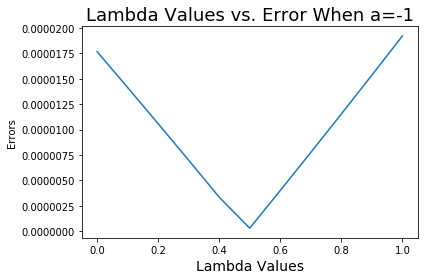

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.plot(Lambda_values, errors)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=-1", fontsize = 18)

fig.tight_layout()

plt.show()


# Is there a value of λ that you would consider the best choice?
- **Based on the two cells and the graph above, it can be seen that 0.5 appears the be the best choice for lambda since that is where the error appears to be the smallest.**

In [82]:
# ERROR AND LAMBDA WHEN A=-100 AND P=1
# for different Lambda, p = 1, a = -100

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors2 = []
for Lambda in Lambda_values:
    error = simulation(-100, Lambda, 1000, 1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors2.append(error)


Lambda is 0 and error is 1.766384825808931e-05
Lambda is 0.1 and error is 1.4141320875024011e-05
Lambda is 0.2 and error is 1.0583362269944053e-05
Lambda is 0.3 and error is 6.98959173865632e-06
Lambda is 0.4 and error is 3.359630288921389e-06
Lambda is 0.5 and error is 3.068987885735952e-07
Lambda is 0.6 and error is 4.010369300908923e-06
Lambda is 0.7 and error is 7.751151481653007e-06
Lambda is 0.8 and error is 1.1529611263688955e-05
Lambda is 0.9 and error is 1.53461094919376e-05
Lambda is 1 and error is 1.920100107144218e-05


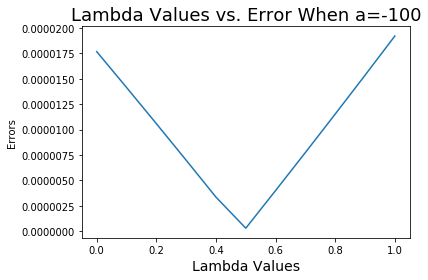

In [119]:
# GRAPH OF LAMBDA VALUES VS ERROR FROM ABOVE
fig, ax = plt.subplots()
plt.plot(Lambda_values, errors2)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=-100", fontsize = 18)

fig.tight_layout()
plt.show()

In [101]:
# ERROR AND LAMBDA WHEN A=-1000 AND P=1
# for different Lambda, p = 1, a = -1000

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors3 = []
for Lambda in Lambda_values:
    error = simulation(-1000, Lambda, 1000, 1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors3.append(error)


Lambda is 0 and error is 0.00013212055882855768
Lambda is 0.1 and error is 0.00010580476935487349
Lambda is 0.2 and error is 7.656500327300215e-05
Lambda is 0.3 and error is 4.3885264710910585e-05
Lambda is 0.4 and error is 7.1205588285576105e-06
Lambda is 0.5 and error is 3.454610783810902e-05
Lambda is 0.6 and error is 8.216515545715658e-05
Lambda is 0.7 and error is 0.00013711021040221154
Lambda is 0.8 and error is 0.0002012127745047757
Lambda is 0.9 and error is 0.00027697035026235143
Lambda is 1 and error is 0.00036787944117144236


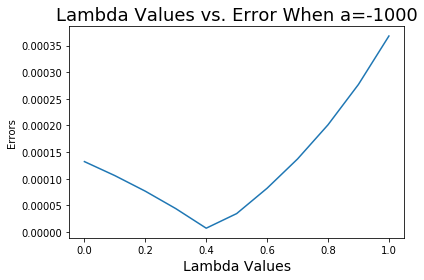

In [120]:
# GRAPH OF LAMBDA VALUES VS ERROR FROM ABOVE
fig, ax = plt.subplots()
plt.plot(Lambda_values, errors3)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=-1000", fontsize = 18)

fig.tight_layout()

plt.show()


In [86]:
# ERROR AND LAMBDA WHEN A=-100000 AND P=1
# for different Lambda, p = 1, a = -100000

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors4 = []
for Lambda in Lambda_values:
    error = simulation(-100000, Lambda, 1000, 1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors4.append(error)


Lambda is 0 and error is 9.900990099009901e-06
Lambda is 0.1 and error is 9.890109890109889e-05
Lambda is 0.2 and error is 0.00023456790123456788
Lambda is 0.3 and error is 0.0004084507042253521
Lambda is 0.4 and error is 0.000639344262295082
Lambda is 0.5 and error is 0.0009607843137254903
Lambda is 0.6 and error is 1.169916651633916e+155
Lambda is 0.7 and error is inf
Lambda is 0.8 and error is inf
Lambda is 0.9 and error is inf
Lambda is 1 and error is inf


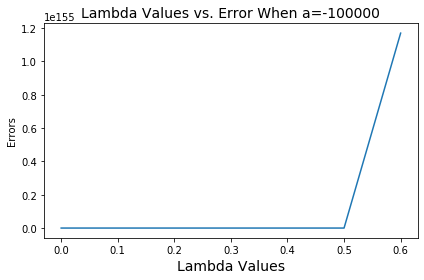

In [127]:
# GRAPH OF LAMBDA VALUES VS ERROR FROM ABOVE
fig, ax = plt.subplots()
plt.plot(Lambda_values, errors4)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=-100000", fontsize = 14)

fig.tight_layout()

plt.show()


In [95]:
# ERROR AND LAMBDA WHEN A=10 AND P=1
# for different Lambda, p = 1, a = 10

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors5 = []
for Lambda in Lambda_values:
    error = simulation(10, Lambda, 1000,1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors5.append(error)


Lambda is 0 and error is 1.1370993087853603
Lambda is 0.1 and error is 0.9045341900936401
Lambda is 0.2 and error is 0.674763590300663
Lambda is 0.3 and error is 0.447748884494973
Lambda is 0.4 and error is 0.22345204735426524
Lambda is 0.5 and error is 0.0018356428311235504
Lambda is 0.6 and error is 0.21713718590051212
Lambda is 0.7 and error is 0.4335027263829652
Lambda is 0.8 and error is 0.6472967065700214
Lambda is 0.9 and error is 0.8585543043653634
Lambda is 1 and error is 1.0673101569928913


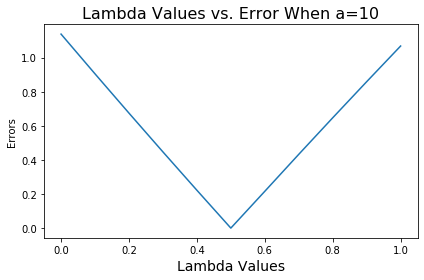

In [125]:
# GRAPH OF LAMBDA VS ERROR FROM ABOVE
fig, ax = plt.subplots()
plt.plot(Lambda_values, errors5)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=10", fontsize = 16)

fig.tight_layout()

plt.show()

In [99]:
# ERROR AND LAMBDA WHEN A=100 AND P=1
# for different Lambda, p = 1, a = 100

N = 10000
Lambda_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

errors6 = []
for Lambda in Lambda_values:
    error = simulation(100, Lambda, 1000, 1)
    print('Lambda is {} and error is {}' .format(Lambda, error))
    errors6.append(error)


Lambda is 0 and error is 5.694364023355046e+42
Lambda is 0.1 and error is 1.8784982110971093e+42
Lambda is 0.2 and error is 6.22267864383587e+41
Lambda is 0.3 and error is 1.9920612016235808e+41
Lambda is 0.4 and error is 5.3561354494965625e+40
Lambda is 0.5 and error is 2.3397415723765358e+39
Lambda is 0.6 and error is 1.6051077440773515e+40
Lambda is 0.7 and error is 2.27881556385385e+40
Lambda is 0.8 and error is 2.5304722893364527e+40
Lambda is 0.9 and error is 2.6262723199316465e+40
Lambda is 1 and error is 2.6634178126360755e+40


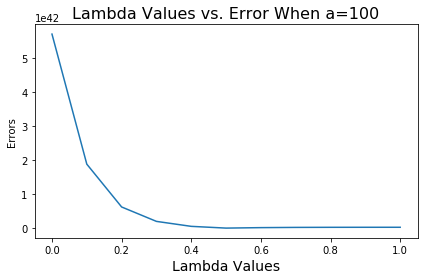

In [124]:
# GRAPH OF LAMBDA VS ERROR FROM ABOVE
fig, ax = plt.subplots()
plt.plot(Lambda_values, errors6)

ax.set_xlabel('Lambda Values', fontsize = 14)
ax.set_ylabel("Errors", fontsize = 10)

plt.title("Lambda Values vs. Error When a=100", fontsize = 16)

fig.tight_layout()

plt.show()


# How does this best value of lambda depend on a ?
- **Based on the graphs above of lambda vs error, the best value of lambda changes when a is <=-1000 and when a is >=100. These values are estimated, however, since not all possible values of a were used to determine lambda for these graphs.**

**Cells below find relative error**

In [104]:
# ESTABLISHING SIMULATION3 AND ABSOLUTE ERROR WHEN A=-5,LAMBDA=0.5, AND P VARIES
N = 100000
a = -5
# define a function to simulate given specific parameters
def simulation3(a, Lambda, N, p):
    y_numerical = [0]*(N+1)
    y_numerical[0] = 1
    
    y_exact = [0]*(N+1)
    y_exact[0] = 1
    
    error = 0
    for n in range(1, N+1):
        y_numerical[n] = (1+a*Lambda/N) / (1-a*(1-Lambda)/N)*y_numerical[n-1]
        y_exact[n] = math.exp(a*n/N)
        
        error = error + abs(y_numerical[n] - y_exact[n])**p
        
    error = error/N
    error = error**(1.0/p)
    return error
# for different a
for p in [1, 10, 100]:
    print('Lambda: 0.5, a: -5, P: {} and error: {}' .format (p, simulation3(-5, 0.5, 10, p)))

Lambda: 0.5, a: -5, P: 1 and error: 0.004017750350926153
Lambda: 0.5, a: -5, P: 10 and error: 0.006545754328214295
Lambda: 0.5, a: -5, P: 100 and error: 0.007700086716278138


In [139]:
# SHOWING RELATIVE ERROR WHEN A=-5,LAMBDA=0.5, N=1000, X=10000 AND P=4
from math import e
a = -5
x = 10000
# p =4, a = -5, x = 10,000, lambda = 0.5

rel_error = simulation3(-5,0.5,1000,4)/(e**a*x)
print("Relative Error:{}, Absolute error:{}" .format (rel_error,simulation3(-5,0.5,1000,4)))

Relative Error:8.090320509323883e-09, Absolute error:5.451215079743848e-07


In [140]:
# SHOWING RELATIVE ERROR WHEN A=-5,LAMBDA=0.5, N=1000, X=10000 AND P=1
a = -5
x = 10000
# p =1, a = -5, x = 10,000, lambda = 0.5

rel_error = simulation3(-5,0.5,1000,1)/(e**a*x)
print("Relative Error:{}, Absolute error:{}" .format (rel_error,simulation3(-5,0.5,1000,1)))

Relative Error:5.934400158946973e-09, Absolute error:3.9985673742349085e-07


In [141]:
# SHOWING RELATIVE ERROR WHEN A=-5,LAMBDA=0.5, N=1000, X=10000 AND P=10
a = -5
x = 10000
# p =10, a = -5, x = 10,000, lambda = 0.5

rel_error = simulation3(-5,0.5,1000,10)/(e**a*x)
print("Relative Error:{}, Absolute error:{}" .format (rel_error,simulation3(-5,0.5,1000,10)))

Relative Error:9.469163219386206e-09, Absolute error:6.380271989791379e-07


In [143]:
# SHOWING RELATIVE ERROR WHEN A=-5,LAMBDA=0.5, N=1000, X=10000 AND P=100
a = -5
x = 10000
# p =100, a = -5, x = 10,000, lambda = 0.5

rel_error = simulation3(-5,0.5,1000,100)/(e**a*x)
print("Relative Error:{}, Absolute error:{}" .format (rel_error,simulation3(-5,0.5,1000,100)))

Relative Error:0.0, Absolute error:0.0


# How does the method of determining error affect the results?
**Looking at absolute vs relative error in the cells in the section above (as well as the section before), the relative error appears to be significantly smaller (~100x) than the absolute error. This is likely because the actual value of the equation is in the denominator and is a rather small number. This relative error is a more an uncertainty-type value and is useful, but in the context of this problem I would argue that the absolute error is a more useful metric for determining the accuracy of the error approxmination since it gives the actual difference between the expected and true values rather than a percentage of how much the absolute error is compared to the general solution.**